In [5]:
#Import libraries 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split



In [6]:
#Import EMG Dataset
X = np.genfromtxt('traing_matrix05.csv', delimiter=',', skip_header=2)
X1 = np.genfromtxt('test_matrix05.csv', delimiter=',', skip_header=2)

m,n = np.shape(X)

x_train = []
y_train = [] 
x_test = []
y_test = []


#Split data x_train, y_train
x_train = X[:,0:n-7]
#y_train = X[:,65:71]
y_train = X[:,64]


#Test data 
x_test = X1[:,0:n-7]
#y_test = X1[:,65:71]
y_test=X1[:,64]

y_class_test=X1[:,64]

In [7]:
print(len(x_test))
print(np.shape(x_train))

240
(624, 64)


In [8]:
x_train_cl=[]

for i in range(len(x_train)):
    x_train_cl.append([])
    h=0
    for j in range (0, 8):
        x_train_cl[i].append([])
        x_train_cl[i][h]=x_train[i][0+8*j]
        h=h+1
        x_train_cl[i].append([])
        x_train_cl[i][h]=x_train[i][1+8*j]
        h=h+1
        x_train_cl[i].append([])
        x_train_cl[i][h]=x_train[i][4+8*j]
        h=h+1

x_test_cl=[]

for i in range(len(x_test)):
    x_test_cl.append([])
    h=0
    for j in range (0, 8):
        x_test_cl[i].append([])
        x_test_cl[i][h]=x_test[i][0+8*j]
        h=h+1
        x_test_cl[i].append([])
        x_test_cl[i][h]=x_test[i][1+8*j]
        h=h+1
        x_test_cl[i].append([])
        x_test_cl[i][h]=x_test[i][4+8*j]
        h=h+1


In [9]:
print(len(x_train_cl))
print(np.shape(x_train_cl))
print(len(x_test_cl))

624
(624, 24)
240


In [10]:
x_train_cl2=[]
h=0
for i in range(104):
    x_train_cl2.append([])
    x_train_cl2[h]=x_train_cl[1+6*i]
    h=h+1
    x_train_cl2.append([])
    x_train_cl2[h]=x_train_cl[3+6*i]
    h=h+1

x_test_cl2=[]
h=0
for i in range(40):
    x_test_cl2.append([])
    x_test_cl2[h]=x_test_cl[1+6*i]
    h=h+1
    x_test_cl2.append([])
    x_test_cl2[h]=x_test_cl[3+6*i]
    h=h+1


In [11]:
print(np.shape(x_train_cl2))
print(h)

print(len(x_train_cl2))

print(np.shape(x_test_cl2))


(208, 24)
80
208
(80, 24)


In [12]:
x_train_st=[]

for i in range (int(len(x_train_cl2)/2)):
    x_train_st.append([])
    x_train_st[i]=np.hstack((x_train_cl2[i*2],x_train_cl2[i*2+1]))
    
x_test_st=[]

for i in range (int(len(x_test_cl2)/2)):
    x_test_st.append([])
    x_test_st[i]=np.hstack((x_test_cl2[i*2],x_test_cl2[i*2+1]))

In [13]:
print(np.shape(x_train_st))
print(np.shape(x_test_st))
x_test_st = np.asarray(x_test_st)
x_train_st = np.asarray(x_train_st)

(104, 48)
(40, 48)


In [14]:
from sklearn.cluster import KMeans
clus=2
#cluster=[]
clusters=[]
cx1=[]
cy1=[]
test_clus=[] #contains test set cluster value
train_xc=[]
train_yc=[]


    #cluster.append([])
cx1.append([])
cy1.append([])
clusters.append([])
test_clus.append([])
train_xc.append([])
train_yc.append([])
train_xc.append([])
train_yc.append([])

xx1_train=((x_train_st))
kmeans = KMeans(n_clusters=clus, random_state=0).fit(xx1_train)
clusters=kmeans.labels_
    
h=0;
i=0;
    
for g in range (len(clusters-1)):

    if clusters[g]==0:
        for j in range (0,6):
            train_xc[0].append([])
            train_yc[0].append([])
            train_xc[0][h]=x_train[(g*6)+j]
            train_yc[0][h]= y_train[(g*6)+j]
            h=h+1

    if clusters[g]==1:
            for j in range (0,6):
                train_xc[1].append([])
                train_yc[1].append([]) 
                train_xc[1][i]=x_train[(g*6)+j]
                train_yc[1][i]=y_train[(g*6)+j]
                i=i+1
                


In [15]:
print(np.shape(train_xc))
print(len(train_xc[0]))
print(len(train_xc[1]))



(2,)
384
240


In [16]:
from sklearn.cluster import KMeans
clus=2

xx1_train=((x_train_st))
kmeans = KMeans(n_clusters=clus, random_state=0).fit(xx1_train)
clusters=kmeans.labels_

In [17]:
print(clusters)
print(len(clusters))
x_train_st=np.asarray(x_train_st)

[0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
104


104


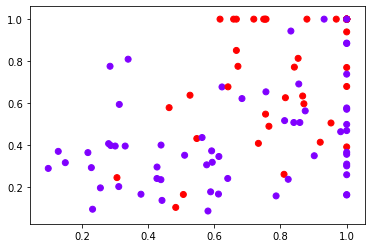

In [18]:
from mpl_toolkits.mplot3d import Axes3D
print(len(clusters))
plt.scatter(x_train_st[:,0],x_train_st[:,3], c=kmeans.labels_, cmap='rainbow')

In [19]:
# Categorize the subject
from sklearn.cluster import KMeans
clus=2

xx1_train=((x_train_st))
kmeans = KMeans(n_clusters=clus, random_state=0).fit(xx1_train)
clusters=kmeans.labels_
y_pred=kmeans.predict(x_test_st)

In [20]:
print(y_pred)
print(sum(y_pred))
print(len(y_pred))

[0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
30
40


In [21]:
h=0
i=0
test_xc=[]
test_yc=[]
test_xc.append([])
test_yc.append([])
test_xc.append([])
test_yc.append([])


for g in range (len(y_pred)):
    
    if y_pred[g]==0:
        for j in range(0,6):
            test_xc[0].append([])
            test_yc[0].append([])
            test_xc[0][h]=x_test[(g*6)+j]
            test_yc[0][h]= y_test[(g*6)+j]
            h=h+1
        
    if y_pred[g]==1:
        for j in range (0,6):
            test_xc[1].append([])
            test_yc[1].append([])
            test_xc[1][i]=x_test[(g*6)+j]
            test_yc[1][i]= y_test[(g*6)+j]
            i=i+1

In [22]:
print(len(test_xc[0]))
print(len(test_xc[1]))
print(len(test_xc))
print(len(test_xc[0]))
print(test_yc[1][0])
print(test_yc[1][1])
print(test_yc[1][2])
print(test_yc[1][3])
print(test_yc[1][4])
print(test_yc[1][5])

60
180
2
60
1.0
2.0
3.0
4.0
5.0
6.0


In [23]:
print(test_yc[0])
print(len(test_yc[0]))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
60


In [24]:
from sklearn.neighbors import KNeighborsClassifier
pred=[]
prob=[]
for f in range(len(test_xc)):
    pred.append([])
    prob.append([])
    neigh=KNeighborsClassifier(n_neighbors=10)
    neigh.fit(train_xc[f],train_yc[f])
    pred[f]=neigh.predict(test_xc[f])
    prob[f]=neigh.predict_proba(test_xc[f])
        
        
    

In [25]:
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from itertools import combinations
import matplotlib.pyplot as plt

# for sklearn 0.18's alternative syntax
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < '0.18':
    from sklearn.grid_search import train_test_split
else:
    from sklearn.model_selection import train_test_split

In [26]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):

        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [49]:

print(f)

1


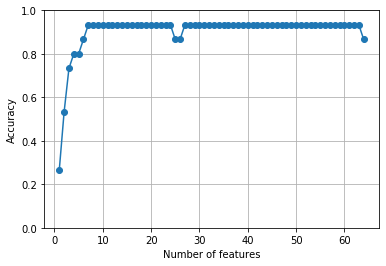

In [58]:
knn=neigh

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(np.array(test_xc[0]), np.array(test_yc[0]))

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
# plt.tight_layout()
# plt.savefig('./sbs.png', dpi=300)
plt.show()



In [57]:
print(sbs.subsets_[-22])

(0, 2, 3, 8, 10, 11, 12, 16, 18, 20, 26, 27, 28, 32, 34, 40, 43, 50, 52, 56, 58, 60)


In [39]:
k5 = list(sbs.subsets_[8])
print('Selected top 5 features:\n', df_wine.columns[1:][k5])

knn.fit(X_train_std, y_train)
print('\nPerformance using all features:\n')
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

knn.fit(X_train_std[:, k5], y_train)
print('\nPerformance using the top 5 features:\n')
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))


NameError: name 'df_wine' is not defined

In [197]:
print(len(pred[0]))
print(len(pred[1]))

60
180


In [198]:
print(pred[0])
print(pred[1])

[1. 2. 3. 4. 5. 6. 1. 2. 3. 4. 4. 6. 5. 2. 3. 4. 5. 4. 6. 2. 3. 4. 5. 6.
 1. 2. 3. 4. 5. 6. 1. 2. 3. 4. 5. 6. 1. 2. 3. 4. 3. 6. 1. 2. 1. 4. 5. 6.
 1. 2. 3. 4. 4. 3. 1. 1. 4. 4. 6. 6.]
[1. 2. 3. 3. 5. 5. 1. 2. 3. 3. 5. 5. 1. 2. 3. 4. 5. 5. 1. 2. 3. 4. 5. 5.
 3. 2. 3. 2. 5. 5. 1. 6. 3. 4. 5. 5. 1. 2. 3. 4. 5. 5. 1. 1. 3. 4. 5. 5.
 2. 3. 4. 4. 4. 5. 1. 2. 3. 4. 2. 2. 3. 2. 3. 4. 6. 6. 1. 1. 3. 3. 5. 5.
 1. 2. 3. 4. 5. 5. 1. 2. 3. 4. 5. 5. 1. 2. 3. 4. 5. 5. 3. 2. 3. 3. 6. 6.
 4. 2. 4. 2. 3. 3. 4. 2. 4. 4. 3. 3. 1. 2. 3. 4. 5. 5. 1. 2. 3. 4. 2. 2.
 1. 2. 3. 4. 5. 5. 1. 2. 3. 4. 5. 5. 1. 2. 3. 3. 2. 2. 1. 2. 3. 3. 5. 5.
 1. 5. 4. 4. 5. 5. 1. 2. 3. 4. 2. 2. 1. 2. 3. 4. 5. 5. 1. 2. 3. 4. 5. 5.
 1. 2. 3. 4. 6. 6. 1. 2. 3. 4. 5. 5.]


In [199]:
match1=0;
match2=0;
for f in range(len(pred)):
    
    for g in range (len(pred[f])):
        if pred[f][g]==test_yc[f][g]:
            match1=match1+1
            
print(match1/240)       

0.7041666666666667


In [209]:
from sklearn.metrics import confusion_matrix
confu=confusion_matrix(np.hstack((pred[0],pred[1])),np.hstack((test_yc[0],test_yc[1])))


TypeError: confusion_matrix() got an unexpected keyword argument 'normalize'

In [208]:
print(confu)

[[32  3  1  0  0  0]
 [ 1 34  0  2  4  4]
 [ 3  1 34  6  3  3]
 [ 2  0  5 32  3  1]
 [ 1  1  0  0 26 21]
 [ 1  1  0  0  4 11]]


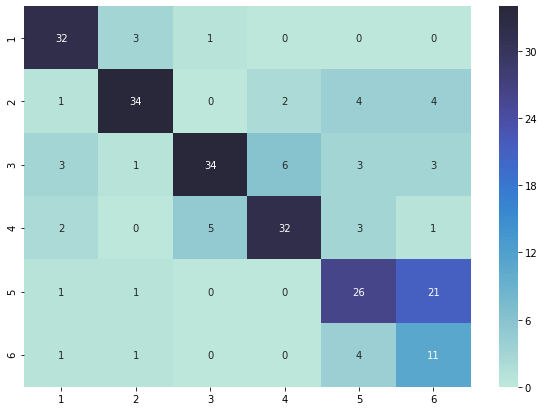

In [240]:

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confu, index = [i for i in "123456"],
                  columns = [i for i in "123456"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, center=40 )